In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Calling Pandas To Read The Files

In [2]:
df = pd.read_excel('/content/IndiaAccidentDataAnalysis.xlsx')

Taking The Overview Of The Dataset

In [3]:
df.tail()

,stateut,region,alcintake2014,alcintake2016,overspeed2014,overspeed2016,overtaking2014,overtaking2016,lanejumping2014,lanejumping2016,wrongside2014,wrongside2016,signalavoid2014,signalavoid2016,asleep2014,asleep2016,othercause2014,othercause2016
33,Maharashtra,west,1251.0,226.0,29790.0,23643.0,1687.0,1883.0,897.0,765.0,796.0,1922.0,9.0,97.0,129.0,378.0,5537.0,3883.0
34,D & N Haveli,west,1.0,0.0,21.0,8.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2.0,65.0,4.0
35,Daman & Diu,west,0.0,7.0,21.0,29.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0,10.0,27.0
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,Total,NaN,18916.0,14894.0,208271.0,268341.0,11262.0,29647.0,10201.0,8513.0,10872.0,17654.0,1332.0,4491.0,3313.0,4552.0,36286.0,50530.0


Dataframe information overview

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   stateut          37 non-null     object 
 1   region           36 non-null     object 
 2   alcintake2014    37 non-null     float64
 3   alcintake2016    37 non-null     float64
 4   overspeed2014    36 non-null     float64
 5   overspeed2016    37 non-null     float64
 6   overtaking2014   37 non-null     float64
 7   overtaking2016   37 non-null     float64
 8   lanejumping2014  37 non-null     float64
 9   lanejumping2016  37 non-null     float64
 10  wrongside2014    37 non-null     float64
 11  wrongside2016    37 non-null     float64
 12  signalavoid2014  37 non-null     float64
 13  signalavoid2016  37 non-null     float64
 14  asleep2014       37 non-null     float64
 15  asleep2016       37 non-null     float64
 16  othercause2014   37 non-null     float64
 17  othercause2016   3

Renaming The Columns

In [5]:
df.rename(columns={'stateut':'State','region':'Region','alcintake2014':'AlcoIntake14','alcintake2016':'AlcoIntake16','overspeed2014':'OverSpeed14','overspeed2016':'OverSpeed16','overtaking2014':'OverTaking14','overtaking2016':'OverTaking16','lanejumping2014':'LaneJump14','lanejumping2016':'LaneJump16','wrongside2014':'WrongSide14','wrongside2016':'WrongSide16','signalavoid2014':'SignalAvoid14','signalavoid2016':'SignalAvoid16','asleep2014':'Asleep14','asleep2016':'Asleep16','othercause2014':'OtherCause14','othercause2016':'OtherCause16'},inplace=True)

Dropping Un-necessary Rows From DataFrame

In [6]:
df.drop(df.index[[36,37]],inplace=True)

Finding Mean Of The Column

In [7]:
mean_Over_Speed=df['OverSpeed14'].mean()

Putting Mean Value In The NAN

In [8]:
df['OverSpeed14'].fillna(value=mean_Over_Speed,inplace=True)


In [9]:
df['TotalStateAccident']= df.sum(axis=1)


<ipython-input-9-8514d6d847f8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['TotalStateAccident']= df.sum(axis=1)


In [10]:
df['TotalAlcoIntake'] = df['AlcoIntake14']+df['AlcoIntake16']
df['TotalOverSpeed'] = df['OverSpeed14']+df['OverSpeed16']
df['TotalOverTaking'] = df['OverTaking14']+df['OverTaking16']
df['TotalLaneJump'] = df['LaneJump14']+df['LaneJump16']
df['TotalWrongSide'] = df['WrongSide14']+df['WrongSide16']
df['TotalSignalAvoid'] = df['SignalAvoid14']+df['SignalAvoid16']
df['TotalAsleep'] = df['Asleep14']+df['Asleep16']
df['TotalOtherCause'] = df['OtherCause14']+df['OtherCause16']

# Performing Exploratory Data Analysis :-

In [11]:
df.head()

,State,Region,AlcoIntake14,AlcoIntake16,OverSpeed14,OverSpeed16,OverTaking14,OverTaking16,LaneJump14,LaneJump16,...,OtherCause16,TotalStateAccident,TotalAlcoIntake,TotalOverSpeed,TotalOverTaking,TotalLaneJump,TotalWrongSide,TotalSignalAvoid,TotalAsleep,TotalOtherCause
0,Chhattisgarh,centre,335.0,145.0,6720.0,6660.0,188.0,467.0,313.0,175.0,...,953.0,17449.0,480.0,13380.0,655.0,488.0,676.0,72.0,225.0,1473.0
1,Jharkhand,centre,611.0,543.0,1627.0,652.0,68.0,155.0,149.0,110.0,...,0.0,4374.0,1154.0,2279.0,223.0,259.0,390.0,38.0,6.0,25.0
2,Madhya Pradesh,centre,3540.0,3083.0,20967.0,28017.0,1165.0,4091.0,1526.0,657.0,...,4589.0,75264.0,6623.0,48984.0,5256.0,2183.0,2232.0,500.0,767.0,8719.0
3,Orissa,centre,637.0,1255.0,3699.0,4984.0,336.0,1194.0,286.0,188.0,...,1375.0,15794.0,1892.0,8683.0,1530.0,474.0,1084.0,189.0,241.0,1701.0
4,Telangana,centre,968.0,202.0,6266.0,13615.0,526.0,539.0,232.0,37.0,...,1301.0,28722.0,1170.0,19881.0,1065.0,269.0,726.0,74.0,171.0,5366.0


Top-5_accidental_region : -


Text(0.5, 1.0, 'RegionWiseAccident')

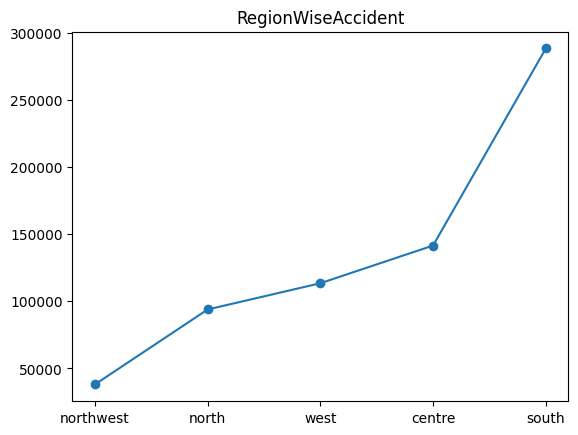

In [25]:
Regional_Accident= df.groupby('Region')['TotalStateAccident'].sum().sort_values(ascending=True).tail()
plt.plot(Regional_Accident.index,Regional_Accident,marker='o')
plt.title("RegionWiseAccident")
# plt.xlabel("Average Pulse")
# plt.ylabel("Calorie Burnage")

Top-5_accidental_state : -

Text(0.5, 1.0, 'State v/s Sum Of Accident')

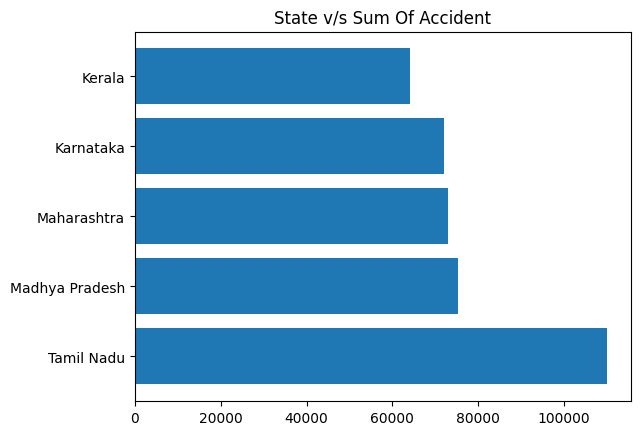

In [28]:
Top_Accidental_State=df.groupby('State')['TotalStateAccident'].sum().sort_values(ascending=False).head()
plt.barh(Top_Accidental_State.index,Top_Accidental_State)
plt.title("State v/s Sum Of Accident")


In [14]:
Top_Accidental_State = df.groupby('State')['TotalStateAccident','TotalAlcoIntake','TotalOverSpeed','TotalOverTaking','TotalLaneJump','TotalWrongSide','TotalSignalAvoid','TotalAsleep','TotalOtherCause'].sum().sort_values(by=['TotalStateAccident'],ascending=False).head()
# plt.plot(Top_Accidental_State.index,Top_Accidental_State)

<ipython-input-14-b25cf473725a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Top_Accidental_State = df.groupby('State')['TotalStateAccident','TotalAlcoIntake','TotalOverSpeed','TotalOverTaking','TotalLaneJump','TotalWrongSide','TotalSignalAvoid','TotalAsleep','TotalOtherCause'].sum().sort_values(by=['TotalStateAccident'],ascending=False).head()


In [15]:
top_accidenttype_state = Top_Accidental_State[['TotalAlcoIntake','TotalOverSpeed','TotalOverTaking','TotalLaneJump','TotalWrongSide','TotalSignalAvoid','TotalAsleep','TotalOtherCause']]

 Finding The State-Wise Accident Cause :-

Text(0.5, 1.0, 'State v/s Top Accident Type')

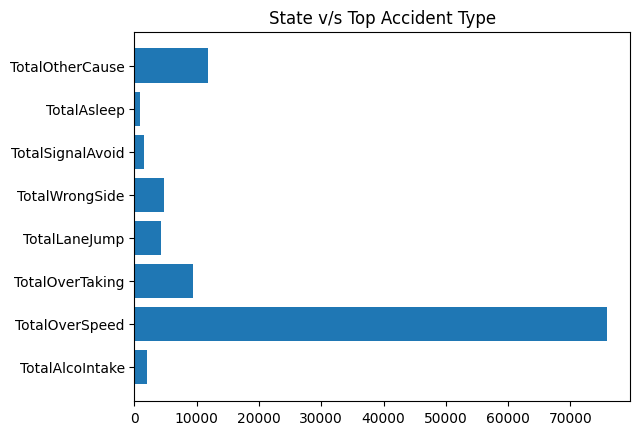

In [27]:
TamilNadu = top_accidenttype_state.iloc[0]
plt.barh(TamilNadu.index,TamilNadu)
plt.title("State v/s Top Accident Type")



In [17]:
region_wise_state=df.groupby(['Region','State']).sum()

In [18]:
region_wise_state.loc['centre']

,AlcoIntake14,AlcoIntake16,OverSpeed14,OverSpeed16,OverTaking14,OverTaking16,LaneJump14,LaneJump16,WrongSide14,WrongSide16,...,OtherCause16,TotalStateAccident,TotalAlcoIntake,TotalOverSpeed,TotalOverTaking,TotalLaneJump,TotalWrongSide,TotalSignalAvoid,TotalAsleep,TotalOtherCause
State,,,,,,,,,,,,,,,,,,,,,
Chhattisgarh,335.0,145.0,6720.0,6660.0,188.0,467.0,313.0,175.0,266.0,410.0,...,953.0,17449.0,480.0,13380.0,655.0,488.0,676.0,72.0,225.0,1473.0
Jharkhand,611.0,543.0,1627.0,652.0,68.0,155.0,149.0,110.0,221.0,169.0,...,0.0,4374.0,1154.0,2279.0,223.0,259.0,390.0,38.0,6.0,25.0
Madhya Pradesh,3540.0,3083.0,20967.0,28017.0,1165.0,4091.0,1526.0,657.0,932.0,1300.0,...,4589.0,75264.0,6623.0,48984.0,5256.0,2183.0,2232.0,500.0,767.0,8719.0
Orissa,637.0,1255.0,3699.0,4984.0,336.0,1194.0,286.0,188.0,519.0,565.0,...,1375.0,15794.0,1892.0,8683.0,1530.0,474.0,1084.0,189.0,241.0,1701.0
Telangana,968.0,202.0,6266.0,13615.0,526.0,539.0,232.0,37.0,570.0,156.0,...,1301.0,28722.0,1170.0,19881.0,1065.0,269.0,726.0,74.0,171.0,5366.0


In [19]:
region_wise_state['AlcoIntake14'].loc['centre']

State
Chhattisgarh       335.0
Jharkhand          611.0
Madhya Pradesh    3540.0
Orissa             637.0
Telangana          968.0
Name: AlcoIntake14, dtype: float64